# Data Visualization Analysis Project
Matt & Esin

In [238]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline

DATA = './data/'
df = pd.read_csv(f'{DATA}Columbia_EDA.csv')
df.head()

,id,member_id,CLI,term,int_rate,installment$,grade,sub_grade,emp_title,emp_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,mths_since_last_delinq
0,1077501,1296599,5000,36 months,10.65,162.87,B,B2,NaN,10+ years,...,861.07,0.00,0.00,0.00,15-Jan,171.62,16-Jan,1,INDIVIDUAL,NaN
1,1077430,1314167,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,435.17,0.00,117.08,1.11,13-Apr,119.66,13-Sep,1,INDIVIDUAL,NaN
2,1077175,1313524,2400,36 months,15.96,84.33,C,C5,NaN,10+ years,...,603.65,0.00,0.00,0.00,14-Jun,649.91,16-Jan,1,INDIVIDUAL,NaN
3,1076863,1277178,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,2209.33,16.97,0.00,0.00,15-Jan,357.48,15-Jan,1,INDIVIDUAL,35.0
4,1075358,1311748,3000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,1009.07,0.00,0.00,0.00,16-Jan,67.79,16-Jan,1,INDIVIDUAL,38.0


In [239]:
df.columns

Index(['id', 'member_id', 'CLI', 'term', 'int_rate', 'installment$', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'pymnt_plan', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'debt to income', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'policy_code', 'application_type',
       'mths_since_last_delinq'],
      dtype='object')

(-1.1233428010807713,
 1.1250575764713757,
 -1.1030518255780744,
 1.1037122716503283)

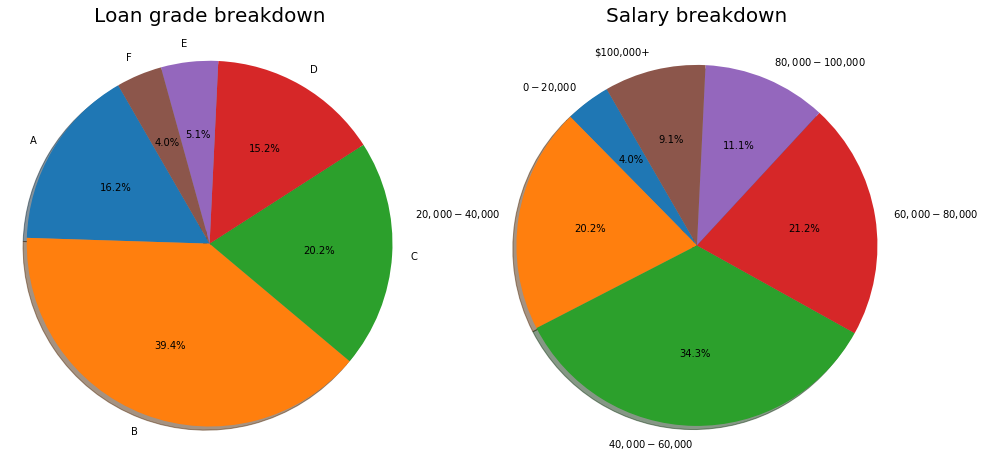

In [241]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Plot loan percent pie chart
labels = ['A', 'B', 'C', 'D', 'E', 'F']
sizes = df.groupby(['grade'])['grade'].count()
ax[0].set_title('Loan grade breakdown', fontsize=20)
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=120)
ax[0].axis('equal')

# Plot salary pie chart
bins = [
    (0, 20000),
    (20000, 40000),
    (40000, 60000),
    (60000, 80000),
    (80000, 100000),
    (100000, 1000000),
]

salary_labels = [
    '$0 - $20,000',
    '$20,000 - $40,000',
    '$40,000 - $60,000',
    '$60,000 - $80,000',
    '$80,000 - $100,000',
    '$100,000+',
]

# Calc percent of salaries in each bin
count = []
for i in range(len(bins)):
    tally = 0
    for income in df['annual_inc']:
        if income >= bins[i][0] and income < bins[i][1]:
            tally += 1
    count.append(tally)
count = list(map(lambda x : x / 99, count))

ax[1].set_title('Salary breakdown', fontsize=20)
ax[1].pie(count, labels=salary_labels, autopct='%1.1f%%', shadow=True, startangle=120)
ax[1].axis('equal')

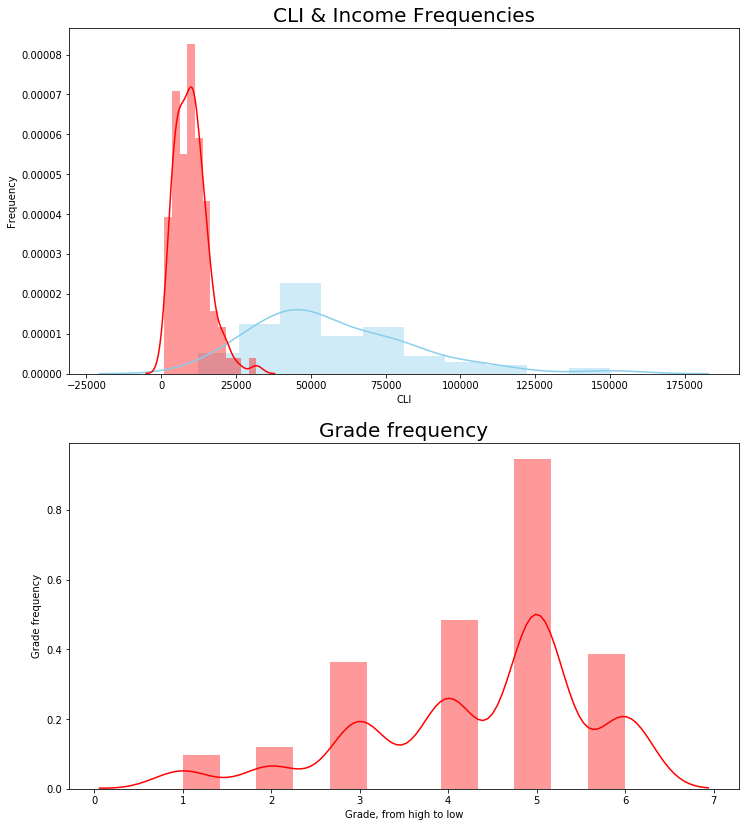

In [243]:
fig, ax = plt.subplots(2, 1, figsize=(12, 14))

# Overlapping histogram of salaries and CLI
ax[0].set_title('CLI & Income Frequencies', fontsize=20)
ax[0].set_xlabel('CLI & Income')
ax[0].set_ylabel('Frequency')

sns.distplot(df['annual_inc'] , color='skyblue', ax=ax[0])
sns.distplot(df['CLI'] , color='red', ax=ax[0])

# Histogram of loan grade
ax[1].set_title('Grade frequency', fontsize=20)
ax[1].set_xlabel('Grade, from high to low')
ax[1].set_ylabel('Grade frequency')
numerical_grade = list(map(lambda g : 6 - (ord(g) - 65), df['grade']))
sns.distplot(numerical_grade, color='red', ax=ax[1])

# Searching for strong correlations
The rationale behind this technique is to keep narrowing down a heatmap, removing irrelevant or poorly-correlated features in each iteration.

But first, feature engineering. We must remove all of the features that really just dont matter. I guess you could technically call this data cleaning, though.

In [240]:
def refine(i, ax_, annot=False, bar=False):
    corr = corr_df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(
        corr,
        mask=mask,
        annot=annot,
        fmt='0.01f',
        cmap='PuRd',
        cbar=bar,
        ax=ax_,
    )
    # ).set_title(f'Correlation matrix refinement (iteration {i})', fontsize=16)

## Correlation refinement
Now that we have made a little framework to easily drop the least correlated features and re-draw the matrix, refining will be easy. I'll do it manually just for simplicity, but know that this process can be easily automated.

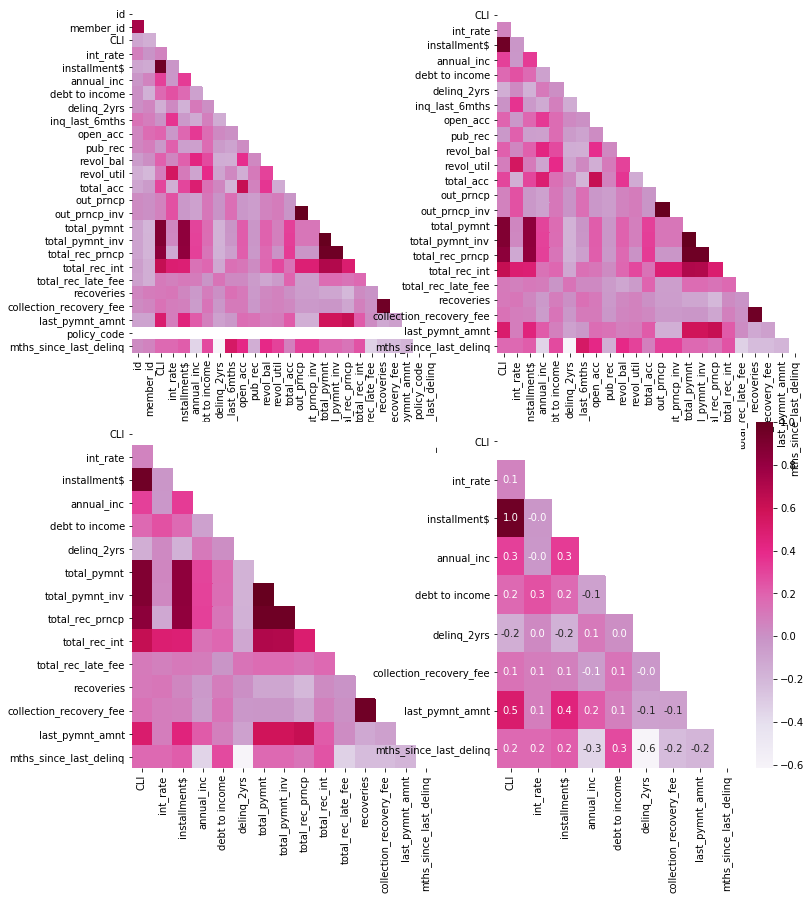

In [242]:
import copy
corr_df = copy.copy(df)

fig, ax = plt.subplots(2, 2, figsize=(12, 14))

# Iteration 0
refine(0, ax[0][0])

# Iteration 1
corr_df.drop([
    'id',
    'member_id',
    'policy_code',
    # 'installment$',
], axis=1, inplace=True)
refine(1, ax[0][1])

# Iteration 2
corr_df.drop(
    corr_df.loc[:, 'earliest_cr_line':'out_prncp_inv'],
    axis=1,
    inplace=True,
)
refine(2, ax[1][0])

# Iteration 3
corr_df.drop(
    corr_df.loc[:, 'total_pymnt':'recoveries'],
    axis=1, inplace=True)
refine(3, ax[1][1], True, True)

[114, 114, 114, 114, 114, 115, 116, 116, 117, 117, 117, 117, 117, 118, 118, 118, 115, 115, 115, 115, 115, 115, 115, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 117, 117, 117, 117, 117, 117, 117, 117, 118, 118, 118, 118, 119, 119, 119, 119, 119, 119, 119, 119, 119, 116, 116, 116, 116, 116, 117, 117, 117, 118, 118, 118, 118, 119, 119, 119, 120, 120, 120, 120, 120, 117, 117, 118, 118, 118, 118, 118, 118, 119, 119, 119, 119, 119, 120, 121, 118, 120, 121, 121, 121, 120, 120, 121, 122]


Text(0, 0.5, 'CLI percent of income')

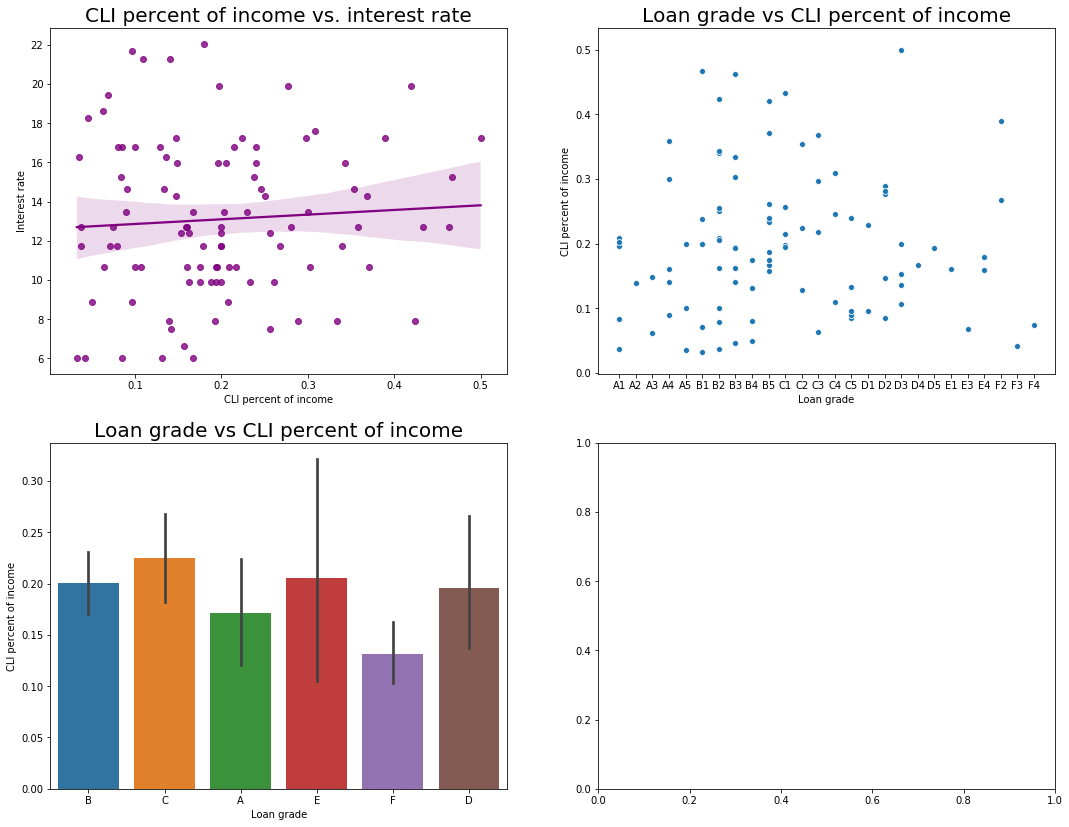

In [268]:
# CLI percent of income vs interest rate
fig, ax = plt.subplots(2, 2, figsize=(18, 14))
intc_comp = df.loc[:, ['annual_inc', 'CLI', 'int_rate']]

x = [] # x axis (cli/annual_inc)
y = intc_comp['int_rate'] # y axis (interest rate)

for row in intc_comp.iterrows():
    cli_p_of_income = row[1]['CLI'] / row[1]['annual_inc']
    x.append(cli_p_of_income)
    
numerical_sub_grade = sorted(df['sub_grade'])
n_sg = list(map(lambda sg : ord(sg[0]) + ord(sg[1]), numerical_sub_grade))
print(n_sg)
            
sns.regplot(x, y, ax=ax[0][0], color='purple')
ax[0][0].set_title('CLI percent of income vs. interest rate', fontsize=20)
ax[0][0].set_xlabel('CLI percent of income')
ax[0][0].set_ylabel('Interest rate')

sns.scatterplot(numerical_sub_grade, x, ax=ax[0][1])
ax[0][1].set_title('Loan grade vs CLI percent of income', fontsize=20)
ax[0][1].set_xlabel('Loan grade')
ax[0][1].set_ylabel('CLI percent of income')

sns.barplot(df['grade'], x, ax=ax[1][0])
ax[1][0].set_title('Loan grade vs CLI percent of income', fontsize=20)
ax[1][0].set_xlabel('Loan grade')
ax[1][0].set_ylabel('CLI percent of income')

In [245]:
# Home ownership status vs interest rate and grade

Text(0.5, 1.0, 'Debt to income vs Months since last delinq')

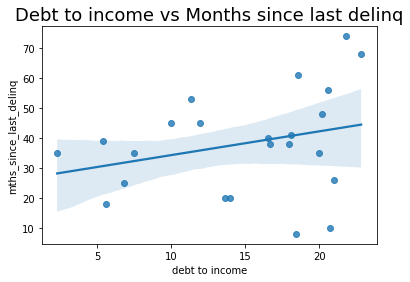

In [246]:
sns.regplot(
    'debt to income', 'mths_since_last_delinq',
    data=corr_df,
).set_title('Debt to income vs Months since last delinq', fontsize=18)

Text(0.5, 1.0, 'delinquencies vs CLI')

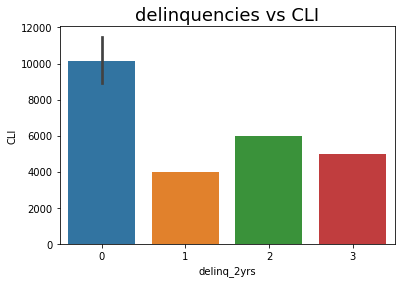

In [247]:
sns.barplot('delinq_2yrs', 'CLI', data=df.iloc[:-15]).set_title('delinquencies vs CLI', fontsize=18)

Text(0.5, 1.0, 'delinquencies vs interest rate')

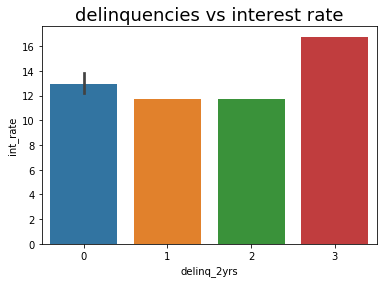

In [248]:
sns.barplot('delinq_2yrs', 'int_rate', data=df.iloc[:-15]).set_title('delinquencies vs interest rate', fontsize=18)